# Importing Libraries

In [1]:
pip install mlflow dagshub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 85.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: sq

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
import mlflow
import dagshub
dagshub.init(repo_owner='reddyrohith49471', repo_name='Churn_prediction', mlflow=True)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

Initialized MLflow to track repo "reddyrohith49471/Churn_prediction"

Repository reddyrohith49471/Churn_prediction initialized!

In [55]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Understanding the Data

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [57]:
del df['customerID']

* we are removing this customerID column beacause customerID will not help us to predict.

In [58]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* There are no missing values in the data

In [59]:
df.shape

(7043, 20)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [61]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* If we observe closely the TotalCharges Column contains numbers but it's dtype is object

  we are going to change that column dtype first

In [62]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')

In [63]:
df['TotalCharges'].dtype

dtype('float64')

In [64]:
df['TotalCharges'].isnull().sum()

np.int64(11)

* We can see that there are few missing values is added to dataset when we converted dtype of TotalCharges column from object to float64

  This is beacause of there will be some some values in letters or with empty spaces

In [65]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [66]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column.

  Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [67]:
df.drop(labels = df[df['tenure']==0].index,axis=0,inplace=True)
df[df['tenure']==0].index

Index([], dtype='int64')

In [68]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [69]:
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [70]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [71]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [72]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [73]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

* Dataset is Highly Imbalanced Dataset

In [74]:
df['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

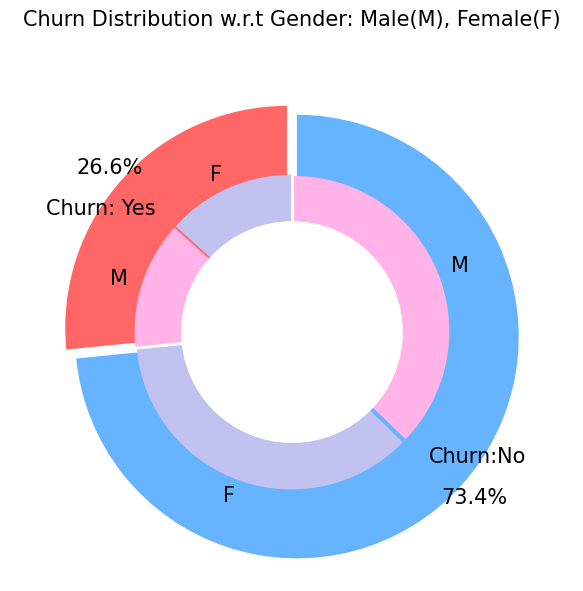

In [75]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

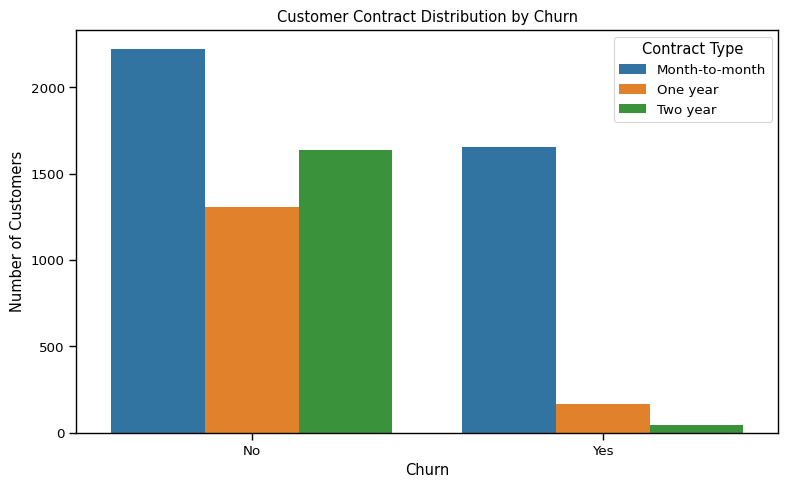

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Churn", hue="Contract")

plt.title("Customer Contract Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="Contract Type")
plt.tight_layout()
plt.show()

* From Chart many of customers with month to month contract are opted to move out.

In [77]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

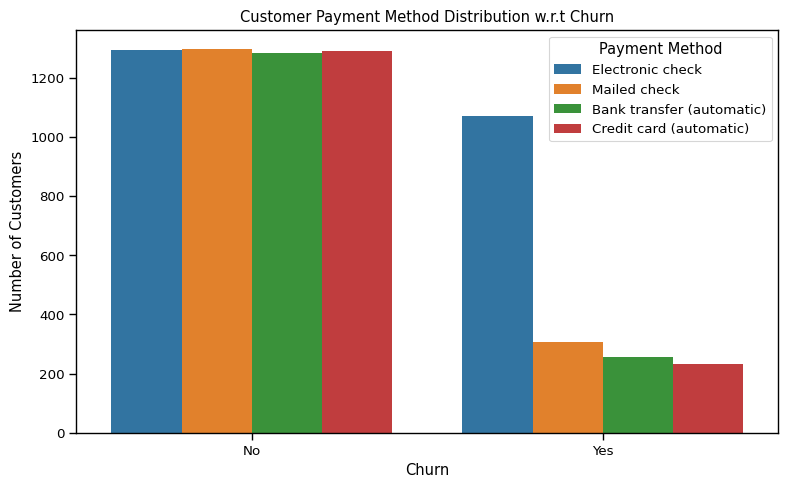

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="Churn",
    hue="PaymentMethod"
)

plt.title("Customer Payment Method Distribution w.r.t Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="Payment Method")
plt.tight_layout()
plt.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [79]:
df["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

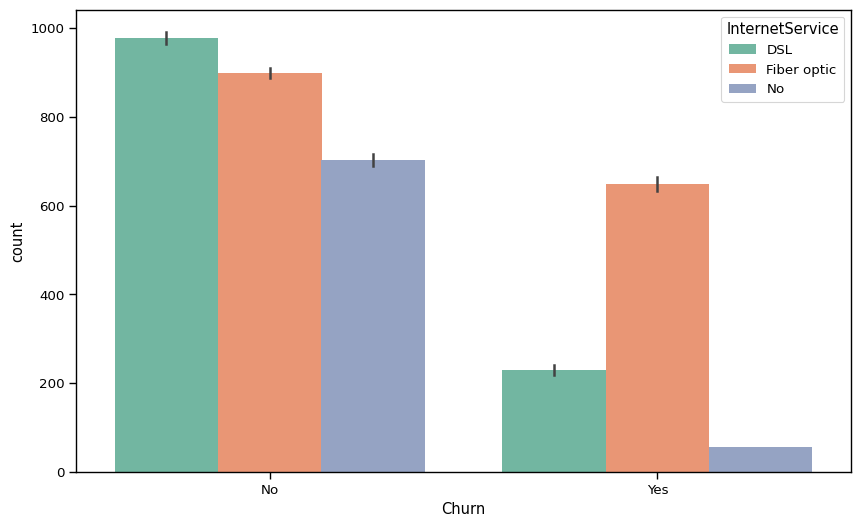

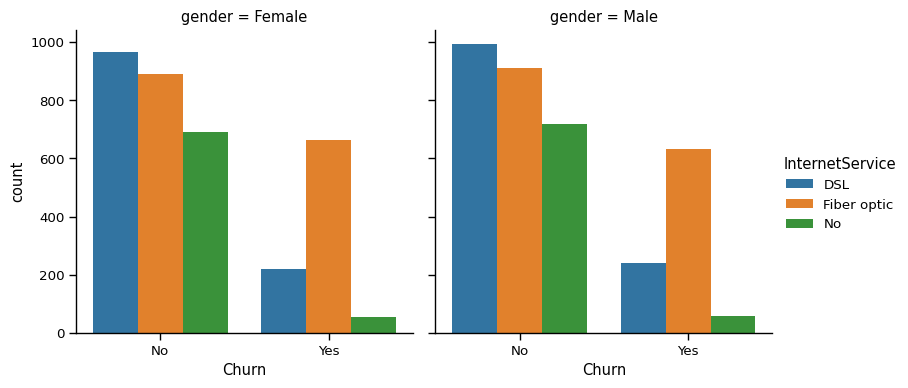

In [80]:
grouped = (
    df.groupby(["Churn", "gender", "InternetService"])
      .size()
      .reset_index(name="count")
)

plt.figure(figsize=(10,6))

sns.barplot(
    data=grouped,
    x="Churn",
    y="count",
    hue="InternetService",
    # multiple="dodge",
    palette="Set2"
)
sns.catplot(
    data=grouped,
    x="Churn",
    y="count",
    hue="InternetService",
    col="gender",
    kind="bar",
    height=4,
    aspect=1
)

plt.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

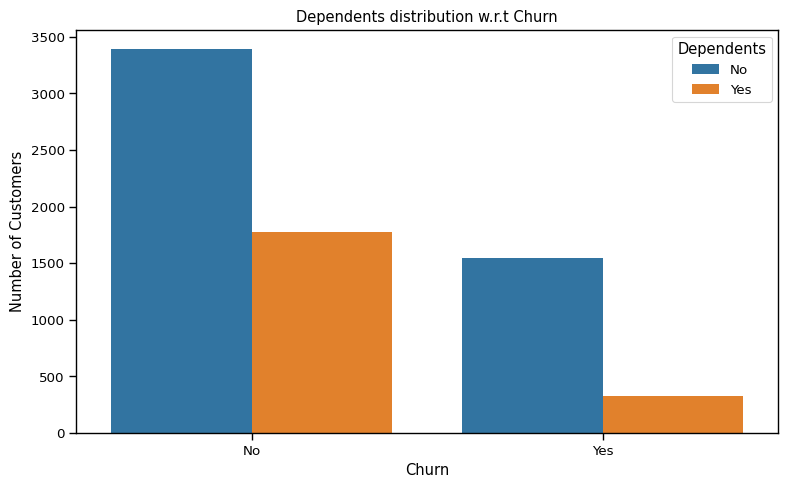

In [81]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="Churn",
    hue="Dependents"
)

plt.title("Dependents distribution w.r.t Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="Dependents")
plt.tight_layout()
plt.show()

* Customers without dependents are more likely to churn

In [82]:
df['Partner'].value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

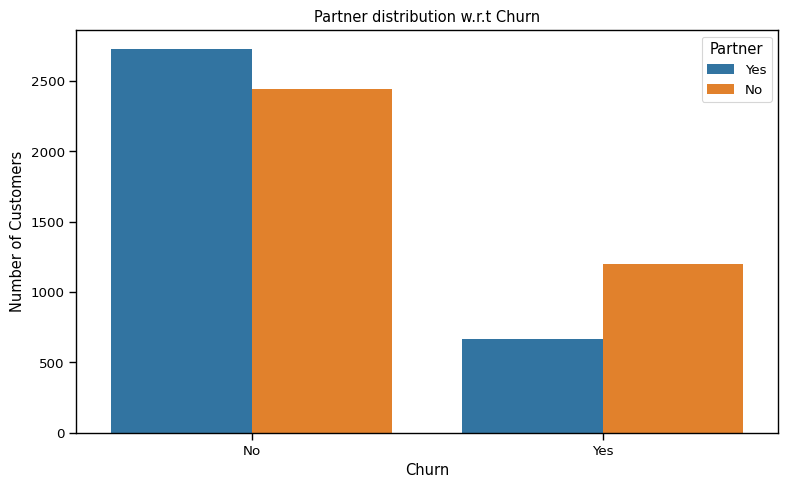

In [83]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="Churn",
    hue="Partner"
)

plt.title("Partner distribution w.r.t Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="Partner")
plt.tight_layout()
plt.show()

* Customers that doesn't have partners are more likely to churn

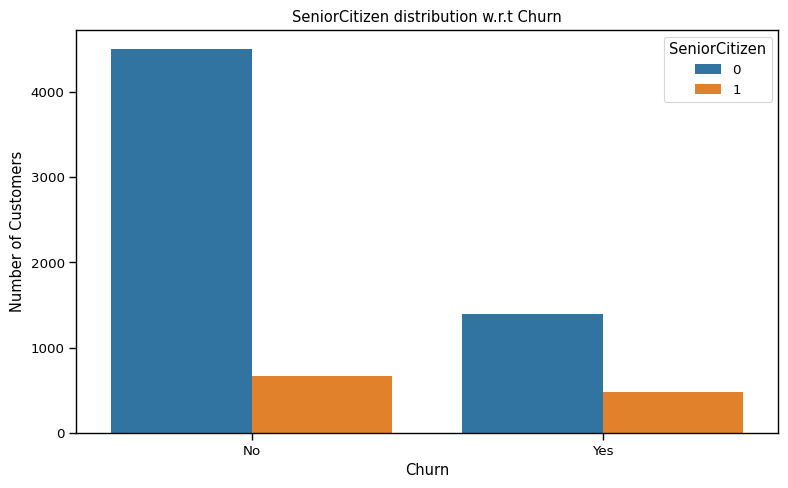

In [84]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="Churn",
    hue="SeniorCitizen"
)

plt.title("SeniorCitizen distribution w.r.t Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="SeniorCitizen")
plt.tight_layout()
plt.show()

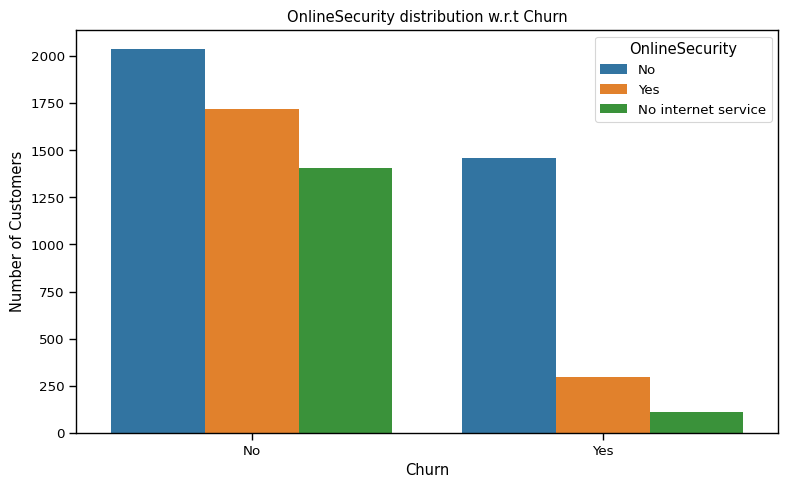

In [85]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="Churn",
    hue="OnlineSecurity"
)

plt.title("OnlineSecurity distribution w.r.t Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="OnlineSecurity")
plt.tight_layout()
plt.show()

* Most customers churn in the absence of online security,

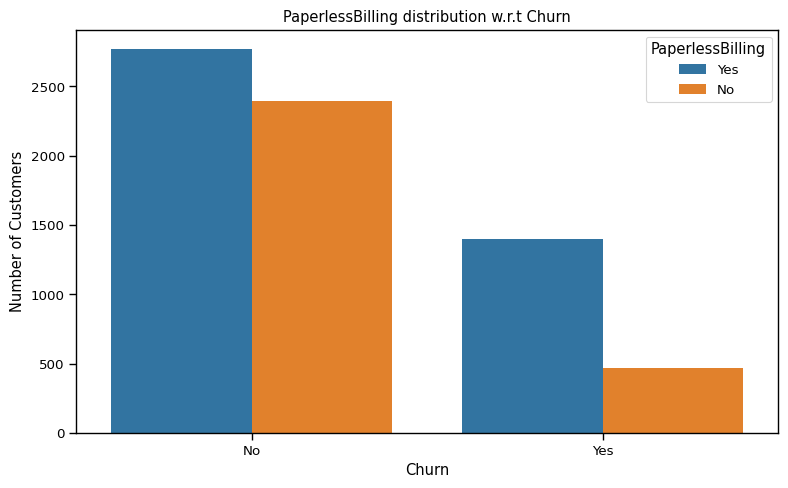

In [86]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="Churn",
    hue="PaperlessBilling"
)

plt.title("PaperlessBilling distribution w.r.t Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="PaperlessBilling")
plt.tight_layout()
plt.show()

* Customers with Paperless Billing are most likely to churn.

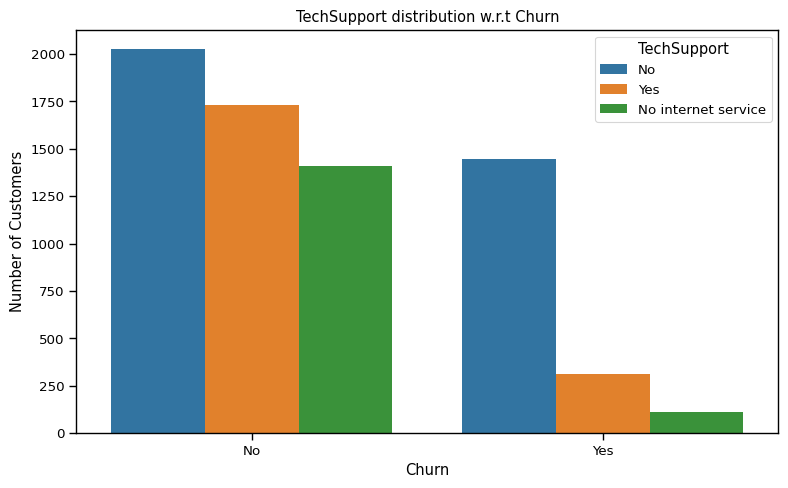

In [87]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="Churn",
    hue="TechSupport"
)

plt.title("TechSupport distribution w.r.t Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="TechSupport")
plt.tight_layout()
plt.show()

* Customers with no TechSupport are most likely to migrate to another service provider.

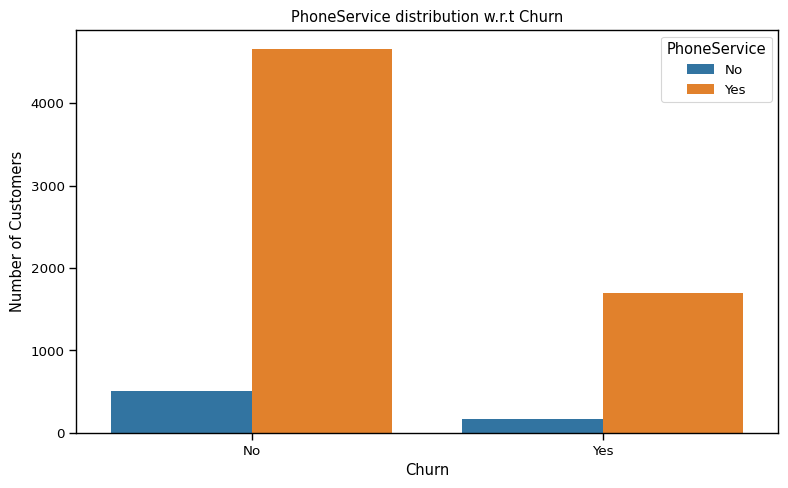

In [88]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="Churn",
    hue="PhoneService"
)

plt.title("PhoneService distribution w.r.t Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="PhoneService")
plt.tight_layout()
plt.show()

* Very small fraction of customers don't have a phone service and out of that, nearly 1/3rd Customers are more likely to churn.

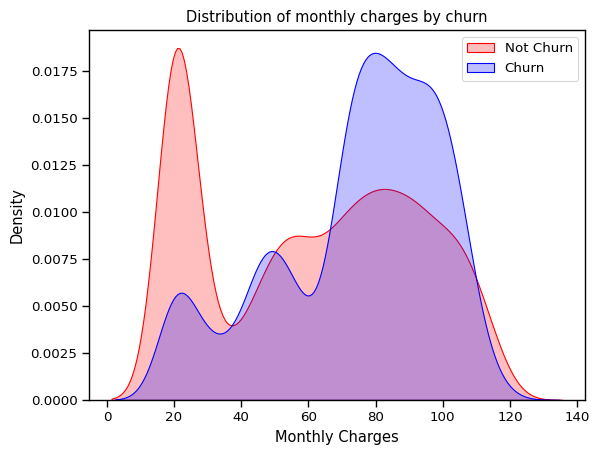

In [89]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

* Customers with higher Monthly Charges are also more likely to churn

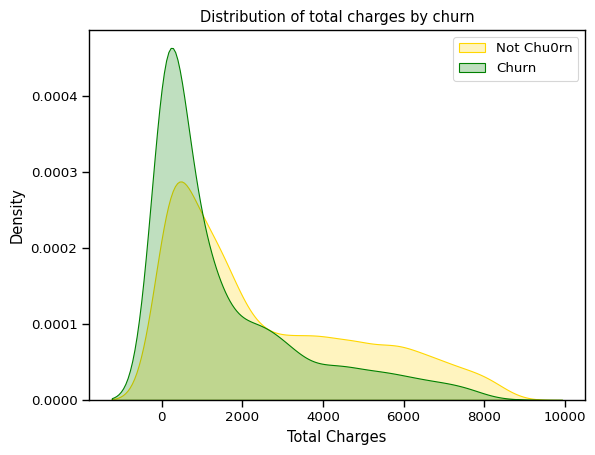

In [90]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

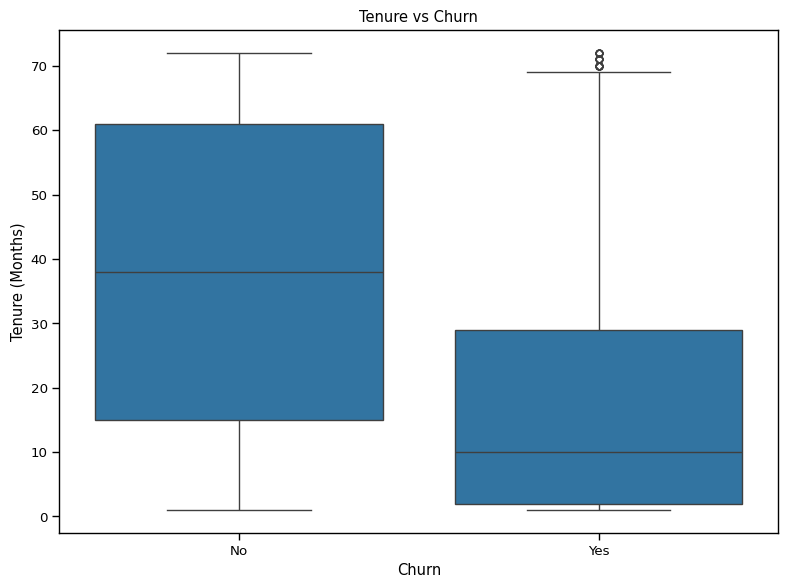

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df,
    x="Churn",
    y="tenure"
)

plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.tight_layout()
plt.show()

In [92]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [94]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print("_"*40)

gender
Male      3549
Female    3483
Name: count, dtype: int64
________________________________________
Partner
No     3639
Yes    3393
Name: count, dtype: int64
________________________________________
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
________________________________________
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
________________________________________
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
________________________________________
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
________________________________________
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
________________________________________
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
___

In [95]:
binary_cols = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling"
]
onehot_cols = [
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaymentMethod"
]
num_cols = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges"
]


In [96]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [97]:
X = df.drop(columns = ['Churn'])
Y = df['Churn']

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [99]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title(f"Distribution for {feature}")
    sns.distplot(frame[feature],color=color)
    plt.show()

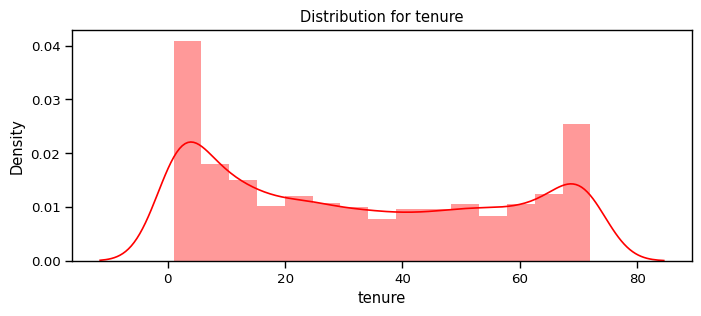

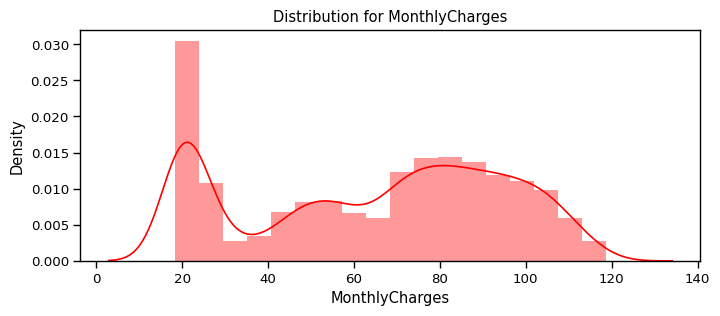

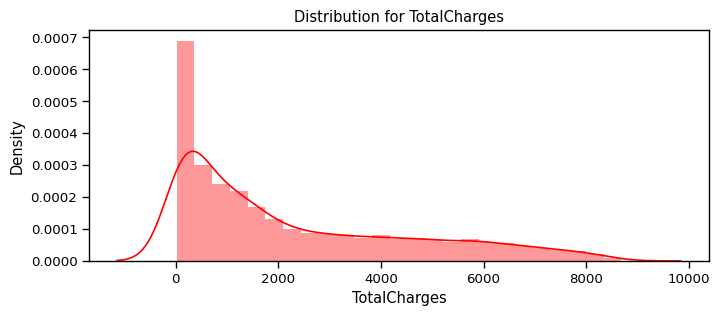

In [100]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    distplot(col,df)

* Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

In [101]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,Male,1,Yes,No,65,Yes,No,Fiber optic,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),70.95,4555.20
5123,Female,1,No,No,15,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1147.45
4135,Female,0,Yes,Yes,36,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.90,3379.25
4249,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [104]:
preprocess = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),num_cols),
        ("bin",OrdinalEncoder(),binary_cols),
        ("cat",OneHotEncoder(handle_unknown="ignore"),onehot_cols)
    ],
    remainder = "passthrough"
)
pipe = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("smote",SMOTE(random_state=42)),
        ("model",LogisticRegression(class_weight='balanced'))
    ]
)

I scaled only the numerical columns because scaling is mainly required for features that have different numeric ranges. Models like Logistic Regression work better when numerical values are on a similar scale, otherwise features with larger values may influence the model more. My dataset also had categorical columns that were converted into numbers, but those values do not represent real continuous quantities, so scaling them would not make sense and could confuse the model. So, to avoid unnecessary transformations and to keep the model learning correctly, I applied scaling only to the numerical columns and kept the remaining columns as they are.

In [105]:
with mlflow.start_run(run_name="LR_baseline"):
    mlflow.set_tag("model_name", "LR")
    model = pipe.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        Y_test, y_pred, labels=[0, 1]
    )
    acc = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision_class_0", precision[0])
    mlflow.log_metric("precision_class_1", precision[1])
    mlflow.log_metric("recall_class_0", recall[0])
    mlflow.log_metric("recall_class_1", recall[1])
    mlflow.log_metric("f1_class_0", f1[0])
    mlflow.log_metric("f1_class_1", f1[1])

    logged_model = mlflow.sklearn.log_model(model, name="LR_model")
    print(logged_model)

🏃 View run LR_baseline at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0/runs/699b4d614ff948dc9b5b124aab26e357
🧪 View experiment at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0


In [106]:
print(classification_report(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.71      0.90      0.80       817
           1       0.78      0.50      0.61       590

    accuracy                           0.73      1407
   macro avg       0.75      0.70      0.70      1407
weighted avg       0.74      0.73      0.72      1407



In [107]:
pipe = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("smote",SMOTE(random_state=42)),
        ("model",DecisionTreeClassifier())
    ]
)

In [108]:
with mlflow.start_run(run_name="DTC_baseline"):
    mlflow.set_tag("model_name", "DTC")
    model = pipe.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        Y_test, y_pred, labels=[0, 1]
    )
    acc = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision_class_0", precision[0])
    mlflow.log_metric("precision_class_1", precision[1])
    mlflow.log_metric("recall_class_0", recall[0])
    mlflow.log_metric("recall_class_1", recall[1])
    mlflow.log_metric("f1_class_0", f1[0])
    mlflow.log_metric("f1_class_1", f1[1])

    logged_model = mlflow.sklearn.log_model(model, name="Decision_Tree_Classifier_model")
    print(logged_model)

🏃 View run DTC_baseline at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0/runs/355aa78b9bca4a6ab7ec71dae26b252b
🧪 View experiment at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0


In [109]:
print(classification_report(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       963
           1       0.55      0.47      0.51       444

    accuracy                           0.71      1407
   macro avg       0.66      0.65      0.65      1407
weighted avg       0.70      0.71      0.71      1407



In [110]:
pipe = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("smote",SMOTE(random_state=42)),
        ("model",RandomForestClassifier())
    ]
)

In [111]:
with mlflow.start_run(run_name="RFC_baseline"):
    mlflow.set_tag("model_name", "RFC")
    model = pipe.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        Y_test, y_pred, labels=[0, 1]
    )
    acc = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision_class_0", precision[0])
    mlflow.log_metric("precision_class_1", precision[1])
    mlflow.log_metric("recall_class_0", recall[0])
    mlflow.log_metric("recall_class_1", recall[1])
    mlflow.log_metric("f1_class_0", f1[0])
    mlflow.log_metric("f1_class_1", f1[1])

    logged_model = mlflow.sklearn.log_model(model, name="Random_Forest_Classifier_model")
    print(logged_model)

🏃 View run RFC_baseline at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0/runs/ccfaacb1540146b792b55dddec77a087
🧪 View experiment at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0


In [112]:
print(classification_report(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1036
           1       0.56      0.56      0.56       371

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



In [113]:
pipe = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("smote",SMOTE(random_state=42)),
        ("model",XGBClassifier())
    ]
)

In [114]:
with mlflow.start_run(run_name="XGB_baseline"):
    mlflow.set_tag("model_name", "XGB")
    model = pipe.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        Y_test, y_pred, labels=[0, 1]
    )
    acc = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision_class_0", precision[0])
    mlflow.log_metric("precision_class_1", precision[1])
    mlflow.log_metric("recall_class_0", recall[0])
    mlflow.log_metric("recall_class_1", recall[1])
    mlflow.log_metric("f1_class_0", f1[0])
    mlflow.log_metric("f1_class_1", f1[1])

    logged_model = mlflow.sklearn.log_model(model, name="XGB_Classifier_model")
    print(logged_model)

🏃 View run XGB_baseline at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0/runs/8ae43b25942a49a79c1fe1691604e690
🧪 View experiment at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0


In [115]:
print(classification_report(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1019
           1       0.61      0.59      0.60       388

    accuracy                           0.78      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [116]:
pipe = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("smote",SMOTE(random_state=42)),
        ("model",KNeighborsClassifier())
    ]
)

In [117]:
with mlflow.start_run(run_name="KNN_baseline"):
    mlflow.set_tag("model_name", "KNN")
    model = pipe.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        Y_test, y_pred, labels=[0, 1]
    )
    acc = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision_class_0", precision[0])
    mlflow.log_metric("precision_class_1", precision[1])
    mlflow.log_metric("recall_class_0", recall[0])
    mlflow.log_metric("recall_class_1", recall[1])
    mlflow.log_metric("f1_class_0", f1[0])
    mlflow.log_metric("f1_class_1", f1[1])

    logged_model = mlflow.sklearn.log_model(model, name="KNN_Classifier_model")
    print(logged_model)

🏃 View run KNN_baseline at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0/runs/7a526a496c1b43bc834d3f7b89dedb93
🧪 View experiment at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0


In [118]:
print(classification_report(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       801
           1       0.75      0.46      0.57       606

    accuracy                           0.70      1407
   macro avg       0.72      0.67      0.67      1407
weighted avg       0.71      0.70      0.69      1407



In [119]:
pipe = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("smote",SMOTE(random_state=42)),
        ("model",SVC())
    ]
)

In [120]:
with mlflow.start_run(run_name="SVC_baseline"):
    mlflow.set_tag("model_name", "SVC")
    model = pipe.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        Y_test, y_pred, labels=[0, 1]
    )
    acc = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision_class_0", precision[0])
    mlflow.log_metric("precision_class_1", precision[1])
    mlflow.log_metric("recall_class_0", recall[0])
    mlflow.log_metric("recall_class_1", recall[1])
    mlflow.log_metric("f1_class_0", f1[0])
    mlflow.log_metric("f1_class_1", f1[1])

    logged_model = mlflow.sklearn.log_model(model, name="SVC_model")
    print(logged_model)

🏃 View run SVC_baseline at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0/runs/a1efd1718548463b9d99170494696539
🧪 View experiment at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0


In [121]:
print(classification_report(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       877
           1       0.73      0.52      0.60       530

    accuracy                           0.75      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.74      0.75      0.73      1407



# Model Experimentation and Selection
## Logistic Regression
* Logistic Regression was used as the baseline model due to its simplicity and interpretability. It provided an initial benchmark and helped understand the linear relationship between features and customer churn. However, because it assumes linear decision boundaries, it was unable to fully capture complex churn patterns present in the data.

## Decision Tree
* A Decision Tree model was evaluated next to capture non-linear relationships and rule-based patterns. While it learned more complex interactions compared to Logistic Regression, the model showed signs of overfitting and did not significantly improve churn detection performance.

## Random Forest
* To reduce overfitting and improve generalization, Random Forest was applied. By combining multiple decision trees, it produced more stable and consistent predictions. Although overall performance improved compared to a single tree, the recall for churn customers was still limited.

## XGBoost
* XGBoost was tested due to its ability to focus on misclassified samples through boosting. The model achieved competitive results, but its performance was comparable to Random Forest and did not result in a substantial improvement in identifying churn customers.

## KNN
* KNN was evaluated to analyze how a distance-based model behaves on this dataset. While it achieved reasonable accuracy, it was highly sensitive to feature scaling and did not outperform tree-based or kernel-based models, particularly for churn prediction.

## SVC
* Finally, a Support Vector Classifier (SVC) was applied. SVC demonstrated a better balance between accuracy, precision, and recall compared to other baseline models. Its ability to model complex decision boundaries made it the strongest baseline performer for this churn prediction task.

## Final Conclusion
* Based on the comparative evaluation of all baseline models, SVC provided the most balanced performance for predicting customer churn and was selected as the best baseline model for further experimentation.

In [122]:
pipe = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("smote",SMOTE(random_state=42)),
        ("model",SVC())
    ]
)

In [123]:
param_dist = {
    "model__C": [0.1, 1, 10, 50, 100],
    "model__kernel": ["rbf", "poly"],
    "model__gamma": ["scale", "auto"],
    "model__class_weight": [None, "balanced"]
}

In [124]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [125]:
search = RandomizedSearchCV(
    estimator = pipe,
    param_distributions = param_dist,
    n_iter = 20,
    scoring = "f1_macro",
    cv = cv,
    verbose = 2,
    n_jobs=-1,
    random_state = 42
)

In [126]:
with mlflow.start_run(run_name="SVC_Tuned"):
    mlflow.set_tag("model_name", "SVC_Tuned")
    search.fit(X_train, Y_train)
    SVC_Tuned_model = search.best_estimator_
    y_pred = SVC_Tuned_model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        Y_test, y_pred, labels=[0, 1]
    )
    acc = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision_class_0", precision[0])
    mlflow.log_metric("precision_class_1", precision[1])
    mlflow.log_metric("recall_class_0", recall[0])
    mlflow.log_metric("recall_class_1", recall[1])
    mlflow.log_metric("f1_class_0", f1[0])
    mlflow.log_metric("f1_class_1", f1[1])

    best_params = search.best_params_
    mlflow.log_params(best_params)

    logged_model = mlflow.sklearn.log_model(SVC_Tuned_model, name="SVC_Tuned_model")
    print(logged_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🏃 View run SVC_Tuned at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0/runs/5c5ed9b5eba14d5789bb2429bbae1a5e
🧪 View experiment at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0


In [127]:
search.best_params_

{'model__kernel': 'poly',
 'model__gamma': 'auto',
 'model__class_weight': 'balanced',
 'model__C': 1}

In [128]:
search.best_score_

np.float64(0.7229012409317139)

In [129]:
print(classification_report(SVC_Tuned_model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       843
           1       0.77      0.51      0.61       564

    accuracy                           0.74      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.75      0.74      0.73      1407



In [130]:
pipe = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("smote",SMOTE(random_state=42)),
        ("model",RandomForestClassifier(random_state=42))
    ]
)

In [131]:
param_dist = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__max_depth": [None, 5, 10, 15, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"],
    "model__bootstrap": [True, False],
    "model__class_weight": [None, "balanced", "balanced_subsample"]
}

In [132]:
search = RandomizedSearchCV(
    estimator = pipe,
    param_distributions = param_dist,
    n_iter = 20,
    scoring = "f1_macro",
    cv = 5,
    verbose = 2,
    n_jobs=-1,
    random_state = 42
)

In [133]:
with mlflow.start_run(run_name="RFC_Tuned"):
    mlflow.set_tag("model_name", "RFC_Tuned")
    search.fit(X_train, Y_train)
    model = search.best_estimator_
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(
        Y_test, y_pred, labels=[0, 1]
    )
    acc = accuracy_score(Y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision_class_0", precision[0])
    mlflow.log_metric("precision_class_1", precision[1])
    mlflow.log_metric("recall_class_0", recall[0])
    mlflow.log_metric("recall_class_1", recall[1])
    mlflow.log_metric("f1_class_0", f1[0])
    mlflow.log_metric("f1_class_1", f1[1])

    best_params = search.best_params_
    mlflow.log_params(best_params)

    logged_model = mlflow.sklearn.log_model(model, name="RFC_Tuned_model")
    print(logged_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🏃 View run RFC_Tuned at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0/runs/f3a51f1f53394c92a6bae5cd7e706508
🧪 View experiment at: https://dagshub.com/reddyrohith49471/Churn_prediction.mlflow/#/experiments/0


In [134]:
search.best_score_

np.float64(0.7351219855953663)

In [135]:
best_model = search.best_estimator_

In [136]:
print(classification_report(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       925
           1       0.72      0.56      0.63       482

    accuracy                           0.78      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.77      0.78      0.77      1407

[CV] END model__C=10, model__class_weight=None, model__gamma=auto, model__kernel=poly; total time=   3.6s
[CV] END model__C=10, model__class_weight=None, model__gamma=scale, model__kernel=rbf; total time=   4.4s
[CV] END model__C=1, model__class_weight=balanced, model__gamma=auto, model__kernel=poly; total time=   3.5s
[CV] END model__C=1, model__class_weight=balanced, model__gamma=auto, model__kernel=poly; total time=   3.4s
[CV] END model__C=50, model__class_weight=None, model__gamma=auto, model__kernel=rbf; total time=   5.3s
[CV] END model__C=0.1, model__class_weight=balanced, model__gamma=scale, model__kernel=rbf; total time=   3.9s
[CV] END model__C=1, model_

* After experimenting with multiple machine learning models and improving feature encoding strategies, the Tuned Random Forest Classifier (RFC) emerged as the best-performing model. It achieved the highest F1-score for churn customers while maintaining a strong balance between precision and recall, making it more reliable than the other models.

Given its robustness, ability to capture complex feature interactions, and consistent churn detection performance, RFC_Tuned was selected as the final model for this project.

In [ ]:
search.best_params_

## ✅ Model Selection & Experiment Tracking (MLflow)

We trained multiple baseline models (KNN, Decision Tree, Logistic Regression, RandomForest, XGBoost, SVC) and evaluated them on several metrics including Accuracy, F1-score, Precision and Recall — with special focus on the minority (Churn) class.

All experiments were logged using **MLflow**, including:

- preprocessing pipeline
- hyperparameters
- metrics
- best model comparison

You can explore the full experiment history and metrics here:

👉 **MLflow Experiments Dashboard:**  
https://dagshub.com/reddyrohith49471/Churn_prediction/experiments

After comparing models, we selected the **Tuned Random Forest Classifier pipeline** because it provided the best balance between:

- strong accuracy
- improved F1 for churn customers
- reasonable recall without too many false alerts

This makes it suitable for practical churn prediction scenarios.

In [2]:
model_uri = 'models:/m-1a283939510c454fa4b02a4257b6c89e'

In [3]:
from mlflow import pyfunc
model = pyfunc.load_model(model_uri)

2026/01/08 14:34:12 WARNING mlflow.tracing.provider: An error occurred while disabling or re-enabling tracing: cannot import name '_BindParamClause' from 'sqlalchemy.sql.expression' (/usr/local/lib/python3.12/dist-packages/sqlalchemy/sql/expression.py) The original function will still be executed, but the tracing state may not be as expected. For full traceback, set logging level to debug.


In [139]:
y_pred = model.predict(X_test)

In [140]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       925
           1       0.72      0.56      0.63       482

    accuracy                           0.78      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.77      0.78      0.77      1407



In [4]:
import joblib
joblib.dump(model,"best_model.joblib")

['best_model.joblib']